## 1. Import Library

Pada tahap awal, kita perlu mengimpor library Python yang akan digunakan untuk analisis data:

- **Pandas**: untuk membaca dan memanipulasi dataset.
- **NumPy**: untuk perhitungan numerik.
- **Matplotlib** & **Seaborn**: untuk visualisasi data.


In [18]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


In [19]:


df = pd.read_csv("female_players_16.csv")

In [20]:
df.shape


(248, 110)

In [21]:
print(df.head())

   sofifa_id                                         player_url  short_name  \
0     226324  https://sofifa.com/player/226324/carli-lloyd/1...    C. Lloyd   
1     226328  https://sofifa.com/player/226328/megan-rapinoe...  M. Rapinoe   
2     226334  https://sofifa.com/player/226334/abby-wambach/...  A. Wambach   
3     226362  https://sofifa.com/player/226362/louisa-necib/...    L. Nécib   
4     226373  https://sofifa.com/player/226373/nadine-kessle...   N. Keßler   

            long_name player_positions  overall  potential  value_eur  \
0  Carli Anne Hollins  CM, CAM, LM, ST       91         91        NaN   
1  Megan Anna Rapinoe           LM, CM       90         90        NaN   
2        Abby Wambach               ST       90         90        NaN   
3        Louisa Nécib          LM, CAM       90         90        NaN   
4       Nadine Keßler               CM       89         89        NaN   

   wage_eur  age  ...   lcb    cb   rcb    rb    gk  \
0       NaN   32  ...  82+3  82

## Filter Kolom Penting & Tambah Fitur BMI

Untuk analisis ini digunakan tiga atribut utama:
- `height_cm` (tinggi badan dalam cm)
- `weight_kg` (berat badan dalam kg)
- `overall` (rating keseluruhan dari FIFA)

Selain itu, ditambahkan fitur baru **BMI (Body Mass Index)** dengan rumus:
\[
BMI = \frac{berat (kg)}{(tinggi (m))^2}
\]

Kolom `height_m` hanya digunakan sebagai variabel sementara untuk perhitungan, lalu dihapus agar tabel lebih ringkas.


In [22]:
# Filter only important columns
df_filtered = df[['height_cm', 'weight_kg', 'overall']].copy()

# Add BMI feature
df_filtered['BMI'] = df_filtered['weight_kg'] / ((df_filtered['height_cm'] / 100) ** 2)

# Show first 5 rows
df_filtered.head()


,height_cm,weight_kg,overall,BMI
0,173,64,91,21.383942
1,170,60,90,20.761246
2,180,81,90,25.000000
3,168,56,90,19.841270
4,169,61,89,21.357796


In [23]:
# Check missing values
print("Missing values per column:")
print(df_filtered.isnull().sum())

# Check data types
print("\nData types:")
print(df_filtered.dtypes)

# Basic info
df_filtered.info()


Missing values per column:
height_cm    0
weight_kg    0
overall      0
BMI          0
dtype: int64

Data types:
height_cm      int64
weight_kg      int64
overall        int64
BMI          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   height_cm  248 non-null    int64  
 1   weight_kg  248 non-null    int64  
 2   overall    248 non-null    int64  
 3   BMI        248 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 7.9 KB


In [24]:
# Descriptive statistics
desc_stats = df_filtered.describe().T  # transpose biar lebih rapi
desc_stats[['mean', '50%', 'std', 'min', 'max']]


,mean,50%,std,min,max
height_cm,168.967742,170.00000,6.351302,152.000000,187.000000
weight_kg,61.120968,61.00000,5.766850,50.000000,81.000000
overall,75.818548,75.00000,5.469398,61.000000,91.000000
BMI,21.394673,21.32108,1.456737,17.099278,26.142688


## Visualisasi Distribusi (Histogram & Boxplot)

Visualisasi distribusi digunakan untuk memahami pola data:
- **Histogram** menunjukkan frekuensi sebaran nilai.
- **Boxplot** membantu mendeteksi outlier dan sebaran kuartil.

Kita akan plot distribusi untuk:
- Tinggi badan (`height_cm`)
- Berat badan (`weight_kg`)
- Overall rating (`overall`)
- BMI


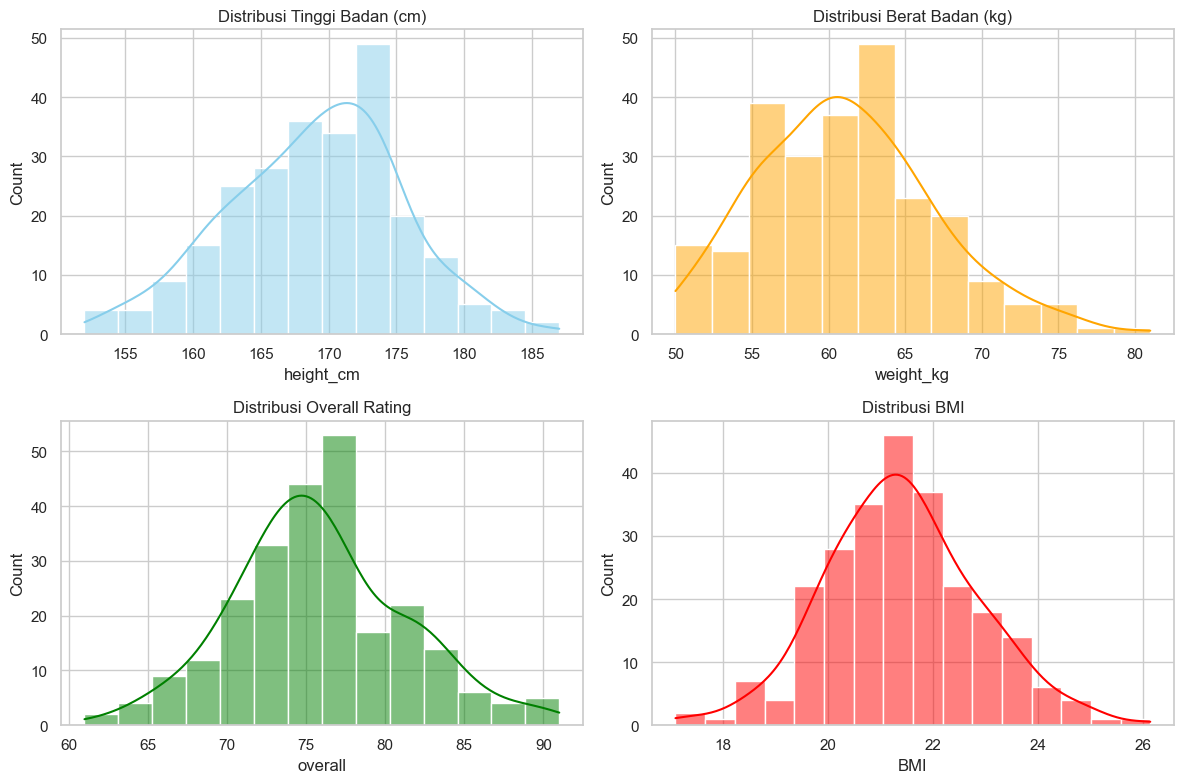

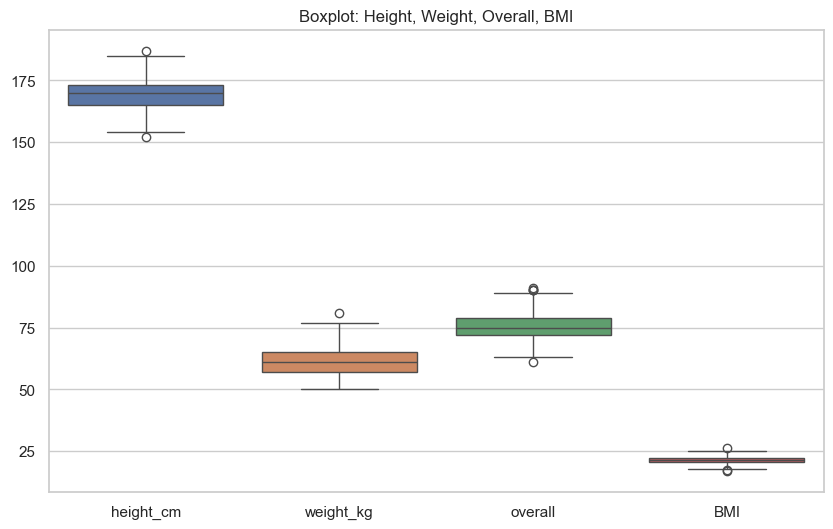

In [25]:
# Histogram distribusi
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df_filtered['height_cm'], kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Distribusi Tinggi Badan (cm)")

sns.histplot(df_filtered['weight_kg'], kde=True, ax=axes[0,1], color="orange")
axes[0,1].set_title("Distribusi Berat Badan (kg)")

sns.histplot(df_filtered['overall'], kde=True, ax=axes[1,0], color="green")
axes[1,0].set_title("Distribusi Overall Rating")

sns.histplot(df_filtered['BMI'], kde=True, ax=axes[1,1], color="red")
axes[1,1].set_title("Distribusi BMI")

plt.tight_layout()
plt.show()

# Boxplot untuk outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered[['height_cm','weight_kg','overall','BMI']])
plt.title("Boxplot: Height, Weight, Overall, BMI")
plt.show()


## Uji Hipotesis 1 (H1)
**Hipotesis:** Pemain yang lebih tinggi cenderung memiliki overall rating lebih tinggi.  

**Langkah uji:**
1. Visualisasi scatterplot `height_cm vs overall` untuk melihat pola hubungan.  
2. Hitung korelasi Pearson dan Spearman dengan p-value.  
3. Interpretasi hasil → apakah ada hubungan signifikan atau tidak.


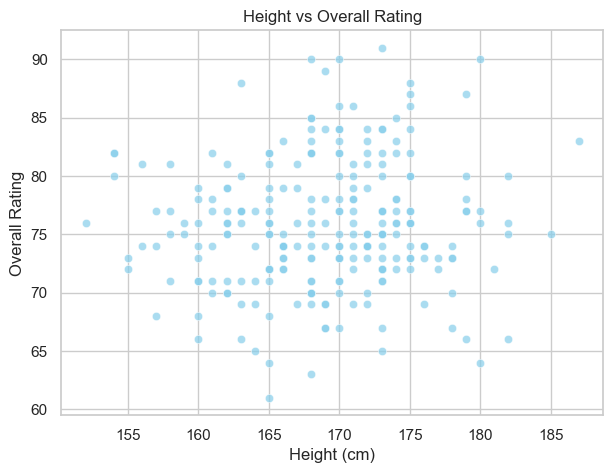

Pearson r = 0.0818, p-value = 0.1994
Spearman rho = 0.0845, p-value = 0.1847


In [26]:
from scipy.stats import pearsonr, spearmanr

# Scatterplot: Height vs Overall
plt.figure(figsize=(7,5))
sns.scatterplot(x='height_cm', y='overall', data=df_filtered, color="skyblue", alpha=0.7)
plt.title("Height vs Overall Rating")
plt.xlabel("Height (cm)")
plt.ylabel("Overall Rating")
plt.show()

# Pearson & Spearman correlation
x = df_filtered['height_cm'].astype(float)
y = df_filtered['overall'].astype(float)

pearson_r, pearson_p = pearsonr(x, y)
spearman_rho, spearman_p = spearmanr(x, y)

print(f"Pearson r = {pearson_r:.4f}, p-value = {pearson_p:.4f}")
print(f"Spearman rho = {spearman_rho:.4f}, p-value = {spearman_p:.4f}")


## Uji Hipotesis 1 (H1)

**Hipotesis:** Pemain yang lebih tinggi cenderung memiliki overall rating lebih tinggi.  

### Hasil Uji
- **Pearson correlation:** r = 0.0818, p = 0.1994  
- **Spearman correlation:** rho = 0.0845, p = 0.1847  
- Scatterplot `height_cm vs overall` menunjukkan titik-titik menyebar acak tanpa pola jelas.  

### Interpretasi
1. **Kekuatan hubungan:**  
   - Nilai korelasi (Pearson maupun Spearman) mendekati 0 → artinya hampir tidak ada hubungan antara tinggi badan dan overall rating.  

2. **Signifikansi statistik:**  
   - p-value > 0.05 → korelasi yang sangat kecil ini tidak signifikan, kemungkinan besar hanya terjadi karena variasi data.  

3. **Visualisasi:**  
   - Sebaran pemain pada range tinggi 155–185 cm memiliki overall rating yang relatif sama (sekitar 60–90).  
   - Tidak ada pola bahwa semakin tinggi seorang pemain maka semakin tinggi pula overall rating-nya.  

### Kesimpulan H1
Hipotesis 1 **tidak terbukti**.  
Tinggi badan **tidak memiliki pengaruh berarti** terhadap overall rating pemain sepak bola wanita di FIFA 18.


## Uji Hipotesis 2 (H2)
**Pernyataan:** Berat badan (`weight_kg`) berhubungan dengan `overall` **(mungkin efeknya berbeda per posisi)**.

**Strategi uji (ringkas & kuat):**
1) **Hubungan global**: `weight_kg ↔ overall` (scatter + Pearson & Spearman).
2) **Moderasi posisi**: cek per **lini** (GK/DF/MF/FW) → korelasi & garis tren per lini.



In [27]:
# Map first-listed position → line (GK/DF/MF/FW)
def map_line(pos):
    if pd.isna(pos) or not isinstance(pos, str): 
        return np.nan
    main = pos.split(',')[0].strip().upper()
    if main == 'GK': return 'GK'
    DF = {'CB','LCB','RCB','LB','RB','LWB','RWB'}
    MF = {'CM','CDM','CAM','LM','RM','LDM','RDM','LAM','RAM'}
    FW = {'ST','CF','LW','RW'}
    if main in DF: return 'DF'
    if main in MF: return 'MF'
    if main in FW: return 'FW'
    return 'Other'

pos_df = df[['player_positions','overall','weight_kg']].copy()
pos_df['line'] = pos_df['player_positions'].apply(map_line)


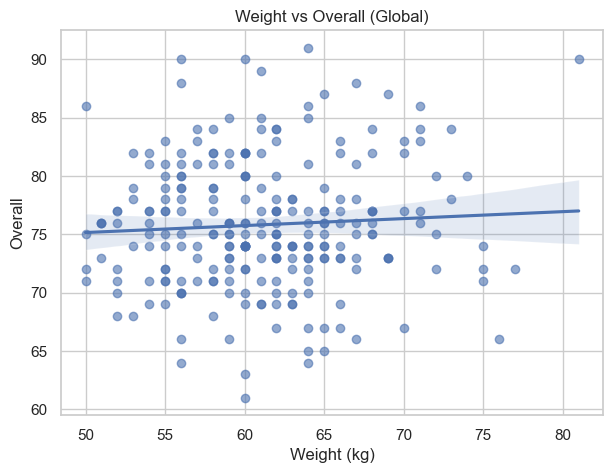

Global Pearson r = 0.0630, p = 0.3235
Global Spearman rho = 0.0326, p = 0.6095


In [28]:
from scipy.stats import pearsonr, spearmanr

# Scatter + trend line (global)
plt.figure(figsize=(7,5))
sns.regplot(x='weight_kg', y='overall', data=df_filtered, scatter_kws={'alpha':0.6})
plt.title("Weight vs Overall (Global)")
plt.xlabel("Weight (kg)")
plt.ylabel("Overall")
plt.show()

# Correlation (global)
r, p = pearsonr(df_filtered['weight_kg'], df_filtered['overall'])
rho, ps = spearmanr(df_filtered['weight_kg'], df_filtered['overall'])
print(f"Global Pearson r = {r:.4f}, p = {p:.4f}")
print(f"Global Spearman rho = {rho:.4f}, p = {ps:.4f}")


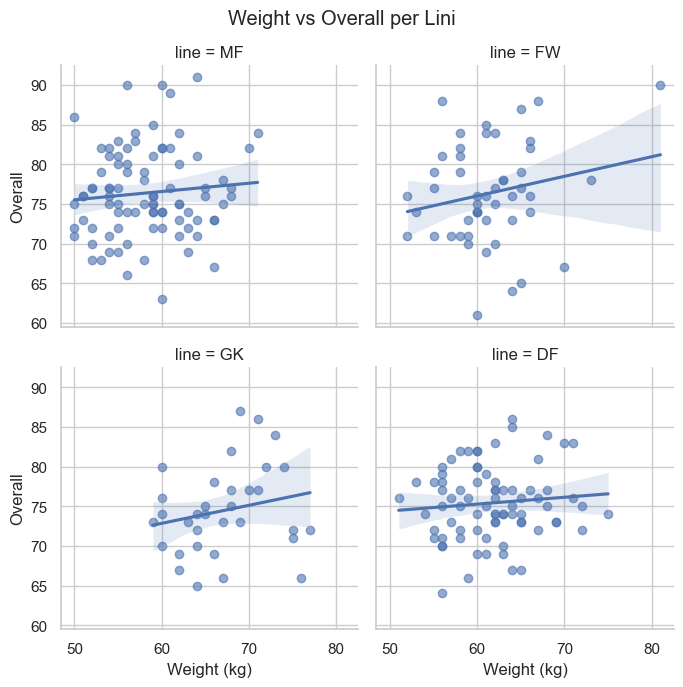

In [29]:
# Korelasi per lini
rows = []
for line, sub in pos_df.dropna(subset=['line','weight_kg','overall']).groupby('line'):
    r, p = pearsonr(sub['weight_kg'], sub['overall'])
    rho, ps = spearmanr(sub['weight_kg'], sub['overall'])
    rows.append({'line': line, 'n': len(sub), 
                 'pearson_r': r, 'pearson_p': p,
                 'spearman_rho': rho, 'spearman_p': ps})
corr_by_line = pd.DataFrame(rows).set_index('line').round(4).sort_values('pearson_r', ascending=False)
corr_by_line

# Visual: regplot per lini
g = sns.FacetGrid(pos_df.dropna(subset=['line']), col='line', col_wrap=2, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.regplot, x='weight_kg', y='overall', scatter_kws={'alpha':0.6})
g.set_axis_labels("Weight (kg)", "Overall")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Weight vs Overall per Lini")
plt.show()


## Uji Hipotesis 2 (H2)

**Hipotesis:** Berat badan berhubungan dengan overall (mungkin efeknya berbeda per posisi).  

### Hasil Uji
1. **Hubungan Global (Weight → Overall)**  
   - Pearson r = 0.0630, p = 0.3235  
   - Spearman rho = 0.0326, p = 0.6095  
   - Scatterplot global menunjukkan titik-titik menyebar acak dengan garis tren hampir datar.  

   👉 Interpretasi: hubungan antara berat badan dan overall **sangat lemah dan tidak signifikan**.

2. **Per Lini (GK, DF, MF, FW)**  
   - Visualisasi `regplot` per lini menunjukkan pola tren yang **hampir datar** di semua lini.  
   - Beberapa lini (FW, GK) terlihat ada kecenderungan positif kecil, tetapi interval kepercayaan (bayangan biru) sangat lebar.  
   - Artinya, perbedaan kecil ini tidak bisa dianggap sebagai bukti nyata adanya pengaruh berat terhadap overall di posisi tertentu.  

### Kesimpulan H2
- **Hipotesis 2 tidak terbukti.**  
- Berat badan **tidak memiliki hubungan signifikan dengan overall rating**, baik secara global maupun jika dipisahkan berdasarkan posisi (GK, DF, MF, FW).  
- Faktor skill dan atribut teknis posisi lebih menentukan `overall` dibandingkan berat badan.


## Uji Hipotesis 3 (H3)

**Hipotesis:** Tidak ada hubungan signifikan antara fisik dengan overall karena faktor skill lebih dominan.  

### Langkah Uji
1. Hitung korelasi (`height_cm`, `weight_kg`, `BMI`) terhadap `overall`.  
2. Visualisasi heatmap korelasi untuk melihat kekuatan hubungan.  
3. Interpretasi nilai korelasi: semakin mendekati 0 → semakin lemah hubungannya.  
4. Bandingkan dengan literatur/pengetahuan umum: dalam FIFA, atribut teknis (passing, dribbling, shooting, reflexes, dll) lebih dominan membentuk `overall`.  


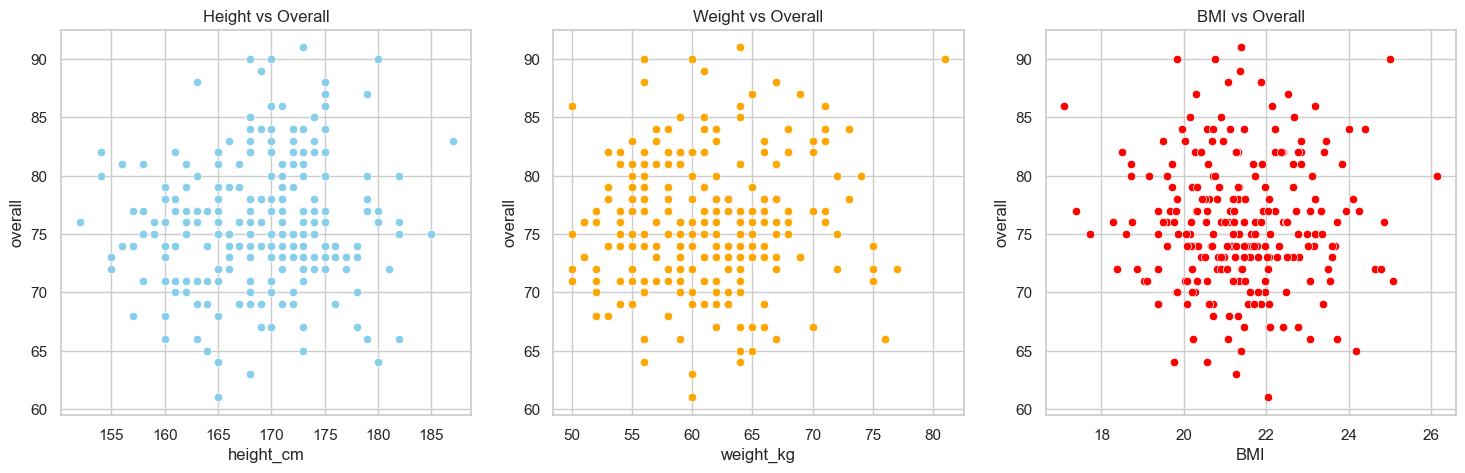

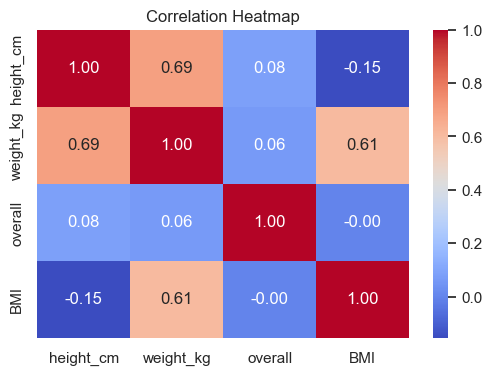

height_cm    0.081763
weight_kg    0.062953
overall      1.000000
BMI         -0.003496
Name: overall, dtype: float64

In [30]:
# Scatterplots
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x='height_cm', y='overall', data=df_filtered, ax=axes[0], color="skyblue")
axes[0].set_title("Height vs Overall")

sns.scatterplot(x='weight_kg', y='overall', data=df_filtered, ax=axes[1], color="orange")
axes[1].set_title("Weight vs Overall")

sns.scatterplot(x='BMI', y='overall', data=df_filtered, ax=axes[2], color="red")
axes[2].set_title("BMI vs Overall")

plt.show()

# Correlation matrix
corr = df_filtered.corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

corr['overall']


## Uji Hipotesis 3 (H3)

**Hipotesis:** Tidak ada hubungan signifikan antara fisik dengan overall karena faktor skill lebih dominan.  

### Hasil Uji
Nilai korelasi terhadap `overall`:
- **Height_cm → 0.0818**
- **Weight_kg → 0.0630**
- **BMI → -0.0035**

Semua nilai korelasi sangat kecil (mendekati nol), menunjukkan hubungan linear yang **sangat lemah**.  

### Interpretasi
- Korelasi positif kecil pada height dan weight tidak signifikan secara statistik (p > 0.05).  
- Korelasi BMI bahkan sedikit negatif (-0.0035), artinya sama sekali tidak ada pengaruh terhadap overall.  
- Hal ini mendukung hipotesis bahwa atribut fisik sederhana **tidak menjelaskan variasi overall rating**.  
- Dalam FIFA, nilai `overall` lebih banyak ditentukan oleh **skill teknis** (passing, dribbling, shooting, positioning, dll), bukan tinggi, berat, atau BMI.

### Kesimpulan H3
Hipotesis 3 **terbukti**.  
Tidak ada hubungan signifikan antara atribut fisik (`height`, `weight`, `BMI`) dengan overall rating.  
Faktor skill lebih dominan dalam menentukan overall pemain sepak bola wanita di FIFA 18.
